In [310]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [311]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv", header=None)

In [312]:
train_df.head()

,Location,Date,ItemName,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,Hsinchu,1/1 00:00,AMB_TEMP,11.1,11.2,11.4,11.5,11.6,11.7,11.9,...,16.6,16.3,15.6,14.8,14.4,14.5,14.7,14.7,14.6,14.4
1,Hsinchu,1/1 00:00,CH4,2.01,1.99,2,2.02,2.03,2.02,2.02,...,1.98,1.97,1.97,2,2.02,2.01,2.01,2,1.98,1.98
2,Hsinchu,1/1 00:00,CO,0.31,0.28,0.28,0.33,0.32,0.26,0.25,...,0.31,0.29,0.29,0.33,0.34,0.34,0.34,0.29,0.24,0.21
3,Hsinchu,1/1 00:00,NMHC,0.1,0.1,0.08,0.09,0.1,0.07,0.07,...,0.06,0.07,0.08,0.12,0.13,0.1,0.1,0.09,0.05,0.06
4,Hsinchu,1/1 00:00,NO,1.5,1.4,1.4,1.5,1.4,1.3,1.4,...,3.5,2.6,2.3,2,1.8,1.8,1.8,1.7,1.5,1.4


In [313]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,index_0,AMB_TEMP,18.2,17.8,17.5,17.5,17.7,18.1,18.2,18.7,20.3
1,index_0,CH4,2.41,2.61,2.65,2.87,2.25,2.24,2.45,2.59,2.24
2,index_0,CO,0.77,0.74,0.63,0.6,0.36,0.31,0.48,1.01,1.05
3,index_0,NMHC,0.29,0.34,0.34,0.37,0.18,0.15,0.24,0.43,0.35
4,index_0,NO,6.8,11.1,9.6,13.6,3.1,2.4,17.8,49.5,41.1


In [314]:
train_days = pd.DataFrame()
items = train_df['ItemName'].iloc[:18].str.strip().to_list()

for i in range(0, len(train_df), 18):
    day = train_df.iloc[i: i+18, 3:]
    train_days.reset_index(drop=True, inplace=True)
    day.reset_index(drop=True, inplace=True)
    train_days = pd.concat([train_days, day], axis=1, ignore_index=True)

train_days = train_days.transpose()
train_days.columns = items
train_days = train_days.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')

train_days

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,11.1,2.01,0.31,0.10,1.5,11.9,13.5,21.6,38,25,0.0,64,0.0,2.11,38,53,3.0,2.6
1,11.2,1.99,0.28,0.10,1.4,10.4,11.9,25.1,29,24,0.0,65,2.1,2.09,41,46,3.4,2.4
2,11.4,2.00,0.28,0.08,1.4,9.8,11.2,25.6,27,13,0.0,63,2.1,2.08,49,43,2.7,2.5
3,11.5,2.02,0.33,0.09,1.5,12.1,13.7,22.4,24,14,0.0,63,1.8,2.11,54,54,3.0,2.5
4,11.6,2.03,0.32,0.10,1.4,12.4,13.9,21.1,29,15,0.0,63,1.1,2.13,50,50,2.6,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,18.5,2.35,0.94,0.36,7.1,42.2,49.3,3.0,33,20,0.0,78,1.6,2.71,139,44,0.3,0.3
5756,18.7,2.36,1.06,0.41,11.6,44.9,56.5,0.9,32,15,0.0,76,1.6,2.77,6,157,0.7,0.1
5757,18.7,2.43,1.24,0.47,26.7,44.9,71.7,0.2,41,22,0.0,78,1.6,2.90,143,98,0.3,0.3
5758,18.5,2.42,1.01,0.38,23.1,42.8,65.9,0.3,27,19,0.0,80,1.5,2.80,169,161,0.5,0.6


In [315]:
train_X = train_days.drop(['PM2.5'], axis=1)
train_y = train_days['PM2.5']

items

['AMB_TEMP',
 'CH4',
 'CO',
 'NMHC',
 'NO',
 'NO2',
 'NOx',
 'O3',
 'PM10',
 'PM2.5',
 'RAINFALL',
 'RH',
 'SO2',
 'THC',
 'WD_HR',
 'WIND_DIREC',
 'WIND_SPEED',
 'WS_HR']

In [316]:
test_days = pd.DataFrame()

for i in range(0, len(test_df), 18):
    day = test_df.iloc[i: i+18, 2:]
    test_days.reset_index(drop=True, inplace=True)
    day.reset_index(drop=True, inplace=True)
    test_days = pd.concat([test_days, day], axis=1, ignore_index=True)

test_days = test_days.transpose()
test_days.columns = items
test_days = test_days.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')

test_days

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,18.2,2.41,0.77,0.29,6.8,30.9,37.7,4.1,53,35,0.0,84,2.8,2.70,140,120,0.4,0.5
1,17.8,2.61,0.74,0.34,11.1,28.2,39.3,2.0,50,35,0.0,85,1.9,2.95,145,115,0.5,0.4
2,17.5,2.65,0.63,0.34,9.6,25.9,35.6,1.9,36,24,0.0,85,1.9,2.99,169,173,0.4,0.3
3,17.5,2.87,0.60,0.37,13.6,22.8,36.4,1.8,39,28,0.0,85,1.9,3.24,177,155,0.4,0.3
4,17.7,2.25,0.36,0.18,3.1,16.5,19.6,7.4,23,15,0.0,81,1.0,2.43,96,104,0.5,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,16.1,1.98,0.27,0.07,0.8,12.4,13.3,33.6,19,14,0.0,67,1.3,2.05,54,57,2.5,2.4
2192,15.8,2.01,0.29,0.09,0.7,11.6,12.3,32.1,19,13,0.0,71,1.3,2.10,53,55,2.2,2.0
2193,15.6,2.04,0.33,0.11,0.8,13.6,14.4,29.6,18,10,0.0,74,1.1,2.15,47,41,1.7,1.6
2194,15.7,2.03,0.32,0.10,0.7,13.6,14.4,30.3,8,11,0.0,78,1.4,2.13,37,36,2.5,2.0


In [317]:
items = train_X.columns.to_list()

In [318]:
test_X = test_days.drop(['PM2.5'], axis=1)
test_y = test_days['PM2.5']

test_X

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
0,18.2,2.41,0.77,0.29,6.8,30.9,37.7,4.1,53,0.0,84,2.8,2.70,140,120,0.4,0.5
1,17.8,2.61,0.74,0.34,11.1,28.2,39.3,2.0,50,0.0,85,1.9,2.95,145,115,0.5,0.4
2,17.5,2.65,0.63,0.34,9.6,25.9,35.6,1.9,36,0.0,85,1.9,2.99,169,173,0.4,0.3
3,17.5,2.87,0.60,0.37,13.6,22.8,36.4,1.8,39,0.0,85,1.9,3.24,177,155,0.4,0.3
4,17.7,2.25,0.36,0.18,3.1,16.5,19.6,7.4,23,0.0,81,1.0,2.43,96,104,0.5,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,16.1,1.98,0.27,0.07,0.8,12.4,13.3,33.6,19,0.0,67,1.3,2.05,54,57,2.5,2.4
2192,15.8,2.01,0.29,0.09,0.7,11.6,12.3,32.1,19,0.0,71,1.3,2.10,53,55,2.2,2.0
2193,15.6,2.04,0.33,0.11,0.8,13.6,14.4,29.6,18,0.0,74,1.1,2.15,47,41,1.7,1.6
2194,15.7,2.03,0.32,0.10,0.7,13.6,14.4,30.3,8,0.0,78,1.4,2.13,37,36,2.5,2.0


In [319]:
train_X = np.array(train_X)
train_y = np.array(train_y)
test_X = np.array(test_X)

In [320]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.1, random_state=13)

In [321]:
LR = 0.000016
EPOCH = 100000

def Mean_square_error(ys, y_pred):
    
    y_diff = ys - y_pred
    y_square = np.square(y_diff)
    mse = y_square.mean(axis=None)
    
    return mse


def gradient_descent(xs, ys, weight, bias):
    
    y_pred = np.matmul(xs, weight) + bias
    y_diff = ys - y_pred
    
    w_grad =  (-2/xs.shape[0]) * (np.matmul(xs.T, y_diff))
    b_grad = (-2/xs.shape[0]) * np.sum(y_diff)
    
    
    weight -= LR * w_grad
    bias -= LR * b_grad


def linear_regression(xs, ys, x_val, y_val):
    
    dim = xs.shape[1]
    weight = np.random.rand(dim, 1)
    bias = 0.
    
    ys = np.reshape(ys, (len(ys), 1))
    y_val_reshape = np.reshape(y_val, (len(y_val), 1))
    
    mse_list = []
    mse_val_list = []
    
    for _ in range(EPOCH):
        y_pred = np.matmul(xs, weight) + bias
        y_val_pred = np.matmul(x_val, weight) + bias
        
        mse = Mean_square_error(ys, y_pred)
        mse_val = Mean_square_error(y_val_reshape, y_val_pred)
        
        mse_list.append(mse)
        mse_val_list.append(mse_val)
        
        gradient_descent(xs, ys, weight, bias)
    
    return weight, bias, mse_list, mse_val_list


def your_model(x_train, y_train, x_val, y_val, x_test):
    
    weight, bias, mse_list, mse_val_list = linear_regression(x_train, y_train, x_val, y_val)
    y_pred = np.matmul(x_test, weight) + bias
    plt.plot(mse_list[1000:])
    plt.plot(mse_val_list[1000:])
    
    return weight, bias, y_pred

AMB_TEMP -0.1574
CH4 0.0863
CO 0.9543
NMHC 0.6001
NO -0.0275
NO2 0.2587
NOx -0.0177
O3 0.022
PM10 0.4149
RAINFALL -0.1817
RH 0.0501
SO2 -0.328
THC 0.0515
WD_HR 0.004
WIND_DIREC 0.006
WIND_SPEED -0.4698
WS_HR -0.3604
Bias 0.0


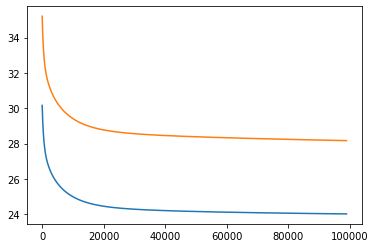

In [322]:
weight, bias, y_pred = your_model(X_train, y_train, X_val, y_val, test_X)

for i in range(len(items)):
    print(items[i], round(weight[i][0], 4))
    
print('Bias', bias)

In [323]:
y_pred = y_pred.tolist()
y_pred = [y_pred[i][0] for i in range(len(y_pred)) if (i+1) % 9 == 0]

pred = []
for i in range(len(y_pred)):
    index = 'index_' + str(i)
    pred.append([index, y_pred[i]])
    
pred = pd.DataFrame(pred)
pred.columns = ['index', 'answer']
pred.to_csv('submission.csv', index=False)